In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./removed_features.csv')
df.shape

(83850, 18)

In [3]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'square_feet', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'availability_365',
       'reviews_per_month'],
      dtype='object')

**Removing part-time listings**

An Airbnb host can setup a calendar for their listing so that it is only available for a few days or weeks a year. Other listings are available all year round (except for when it is already booked). For consistency, I will use Inside AirBnb's definition of highly available being >60 days a year.

I will remove part-time listings by removing availability <60 days a year, and also newly-listed listings with availability >300 days (using the other tail end as approximation).

The below distribution curve shows a bi-modal distribution for availability, demonstrating two concentrations of listing types. The lower availability peaks below 50 days indicating a part-time or non-committed listing, while the higher availability peaks at almost at the maximum 365 indicating a dedicated rental property.

Once used to clean the data, I will remove availability as it is a leaking feature. It reveals how many bookings there will be in the coming year.

Dataset has 25806 rows, 18 columns.
Dataset has 25806 rows, 17 columns.


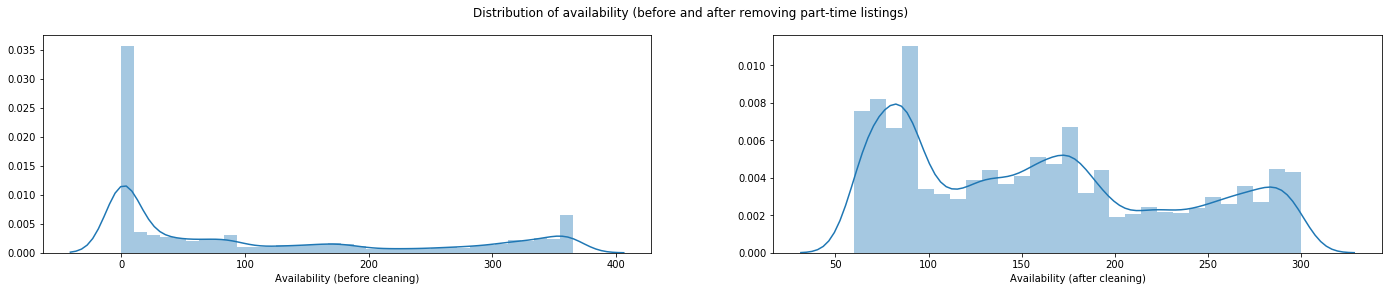

In [4]:
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(24, 4))
fig.suptitle('Distribution of availability (before and after removing part-time listings)')
# Before cleaning
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (before cleaning)'), ax=axs[0])

# Remove where availability less than 60 days or greater than 300 days
df = df.query('60 <= availability_365 <= 300')
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (after cleaning)'), ax=axs[1])
df = df.drop('availability_365', axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))


In [5]:
df.shape

(25806, 17)

**Note -** 
after cleaning we get 25806 rows out of 83850

## Price data analysis

In [6]:
price = df.price.dropna()
price.shape

(25806,)

c:\users\monty\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


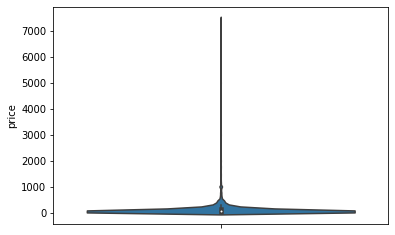

<Figure size 432x288 with 0 Axes>

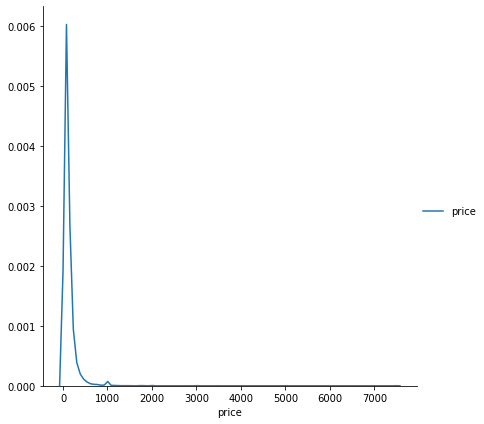

In [7]:
plt.figure(1)
sns.violinplot(y="price", data =df)
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"price") \
      .add_legend();
plt.show()

**Observation** - price can't be zero as well as the price have very few points at the 7000
Let's explore the data more

In [8]:
df.price.describe()

count    25806.000000
mean       126.241029
std        195.755000
min          0.000000
25%         49.000000
50%         86.000000
75%        149.000000
max       7500.000000
Name: price, dtype: float64

In [9]:
df = df[df['price']> 0]
df.shape

(25800, 17)

there are **6** rows which have price value equal to zero 

In [10]:
for i in range(90,100):
    var =df["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 239.0
91 percentile value is 250.0
92 percentile value is 257.0
93 percentile value is 280.0
94 percentile value is 300.0
95 percentile value is 330.0
96 percentile value is 375.0
97 percentile value is 427.0
98 percentile value is 500.0
99 percentile value is 800.0
100 percentile value is  7500.0


so the problem is within the distribution at the 99th percentile let's explore it more 

In [11]:
var =df["price"].values
var = np.sort(var,axis = None)
print(var[-258:])

[ 800.  800.  810.  821.  829.  830.  850.  850.  850.  850.  850.  850.
  875.  875.  880.  880.  888.  888.  890.  892.  895.  898.  900.  900.
  900.  900.  900.  900.  900.  900.  901.  910.  921.  932.  936.  936.
  940.  940.  950.  950.  950.  968.  968.  969.  975.  989.  989.  990.
  990.  990.  990.  991.  995.  995.  995.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1008. 10

In [12]:
# removing all the rows which have price greater than 1800
df = df[df['price'] < 1801]
df.shape

(25766, 17)

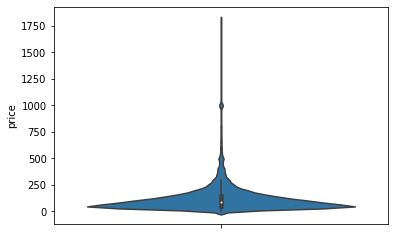

<Figure size 432x288 with 0 Axes>

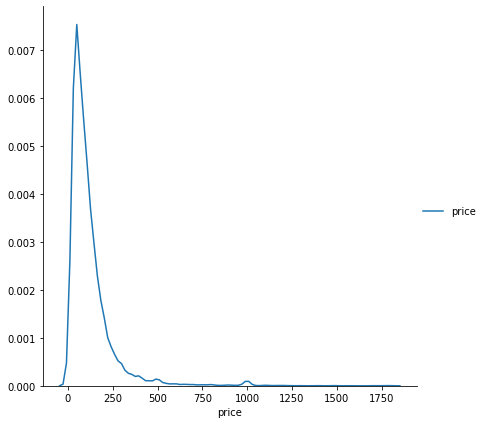

In [13]:
plt.figure(1)
sns.violinplot(y="price", data =df)
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"price") \
      .add_legend();
plt.show()

## Guest data analysis

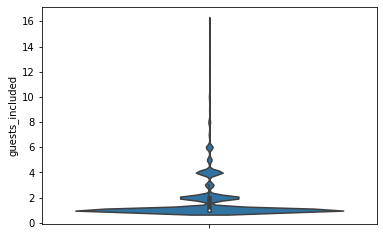

<Figure size 432x288 with 0 Axes>

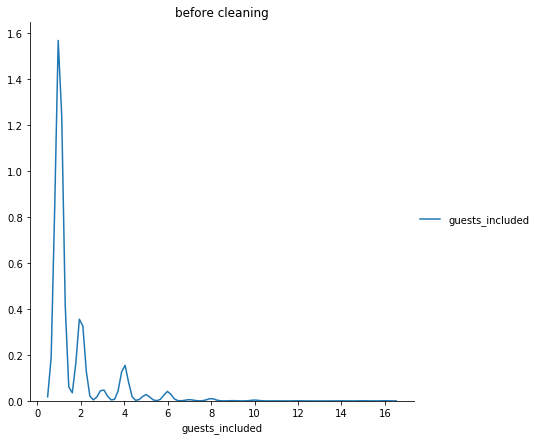

In [14]:
plt.figure(1)
sns.violinplot(y="guests_included", data =df)
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"guests_included") \
      .add_legend();
plt.title('before cleaning')
plt.show()

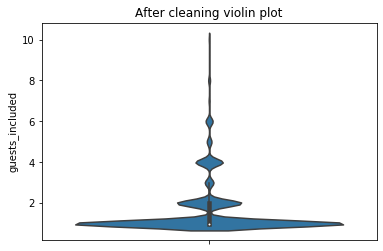

<Figure size 432x288 with 0 Axes>

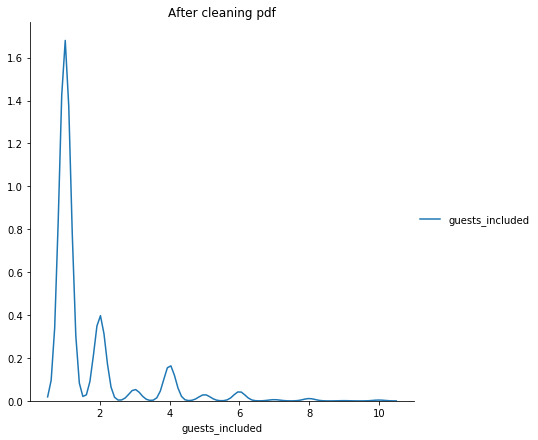

In [15]:
# removing all the rows which have guest_cluded greater than 10
df = df[df['guests_included'] < 11]

plt.figure(1)
sns.violinplot(y="guests_included", data =df)
plt.title('After cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"guests_included") \
      .add_legend();
plt.title('After cleaning pdf')
plt.show()

In [16]:
df.shape

(25741, 17)

## cleaning_fee

In [17]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'square_feet', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'reviews_per_month'],
      dtype='object')

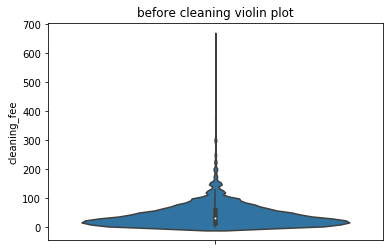

<Figure size 432x288 with 0 Axes>

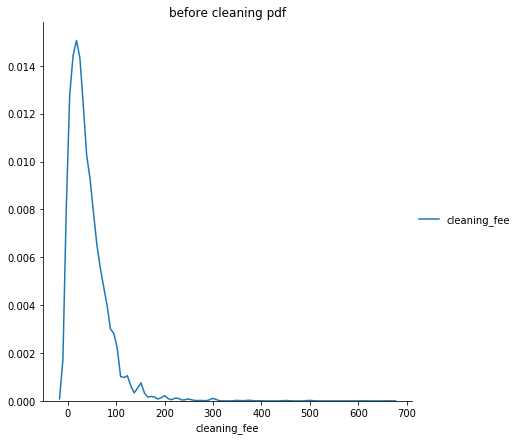

In [18]:
plt.figure(1)
sns.violinplot(y="cleaning_fee", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"cleaning_fee") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

data point before cleaning cleanig_fee less than 300 25741
data point after cleaning cleanig_fee less than 300 20406


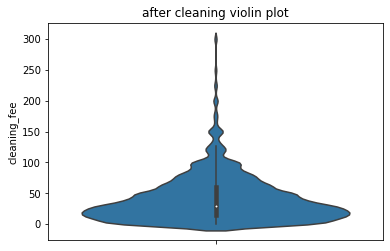

<Figure size 432x288 with 0 Axes>

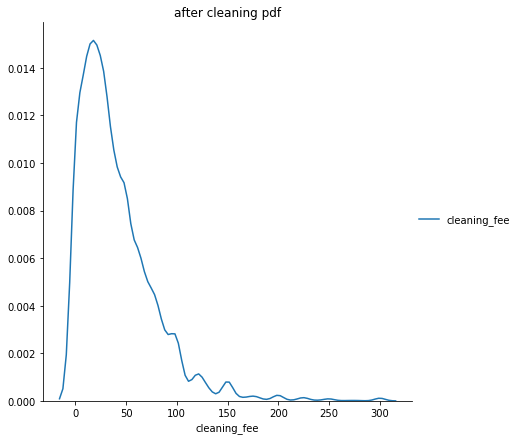

In [19]:
# removing rows which have cleaning fees greater than 300
print('data point before cleaning cleanig_fee less than 300',df.shape[0])
df = df[df['cleaning_fee'] < 301]
print('data point after cleaning cleanig_fee less than 300',df.shape[0])
plt.figure(1)
sns.violinplot(y="cleaning_fee", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"cleaning_fee") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

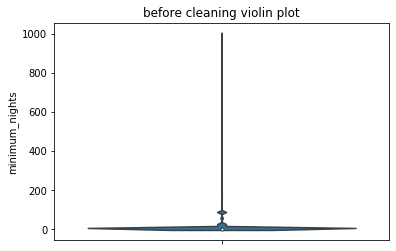

<Figure size 432x288 with 0 Axes>

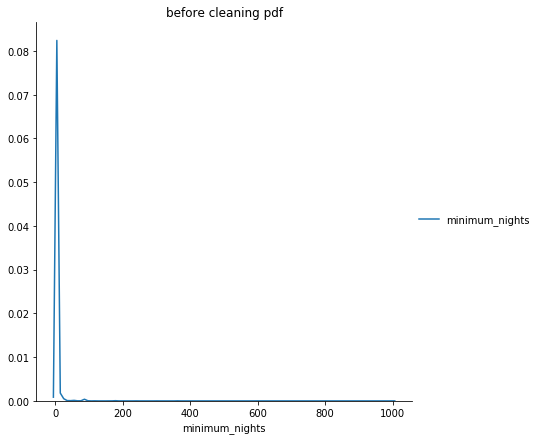

In [20]:
plt.figure(1)
sns.violinplot(y="minimum_nights", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"minimum_nights") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

In [21]:
for i in range(90,100):
    var =df["minimum_nights"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5
91 percentile value is 6
92 percentile value is 7
93 percentile value is 7
94 percentile value is 7
95 percentile value is 7
96 percentile value is 10
97 percentile value is 14
98 percentile value is 28
99 percentile value is 62
100 percentile value is  1000


In [22]:
df.shape

(20406, 17)

In [23]:
var =df["minimum_nights"].values
var = np.sort(var,axis = None)
print(var[-205:])

[  62   62   69   69   70   70   70   78   78   79   80   80   80   80
   80   82   89   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   90   90   90   90   90   90   90   90   90   90
   90   90   90   90   91   91   91   91   91   91   91   91   91   91
   91   91   91   91   91   91   92   92   95  100  100  100  100  100
  120  120  120  120  160  170  180  180  180  180  180  180  182  185
  240 

data point before cleaning cleanig_fee less than 95 20406
data point after cleaning cleanig_fee less than 95 20378


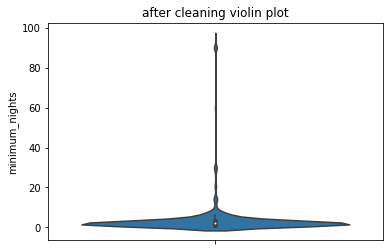

<Figure size 432x288 with 0 Axes>

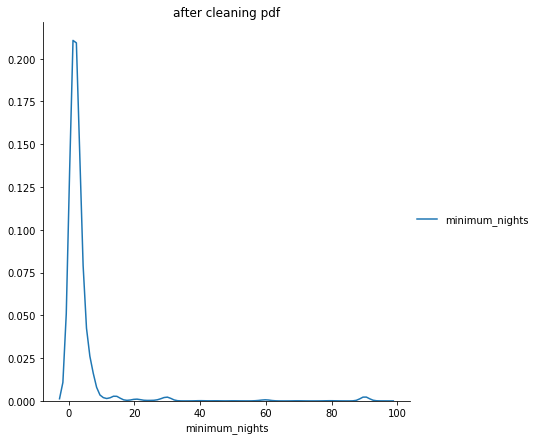

In [24]:

print('data point before cleaning cleanig_fee less than 95',df.shape[0])
# removing all the points less than 95
df = df[df['minimum_nights'] < 96]
print('data point after cleaning cleanig_fee less than 95',df.shape[0])
plt.figure(1)
sns.violinplot(y="minimum_nights", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"minimum_nights") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

In [25]:
df.shape

(20378, 17)

## Accomodations

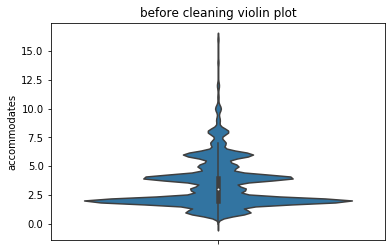

<Figure size 432x288 with 0 Axes>

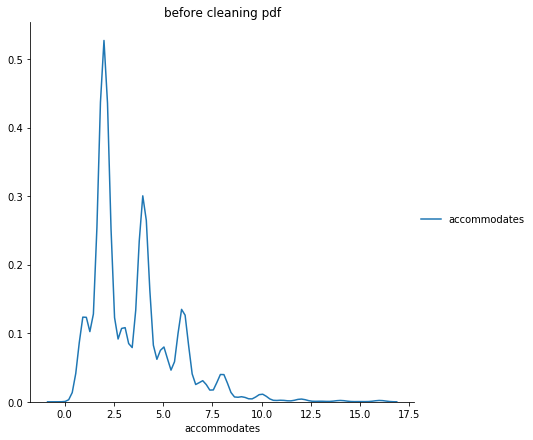

In [26]:
plt.figure(1)
sns.violinplot(y="accommodates", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"accommodates") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

data point before cleaning accomodates less than 12 20378
data point after cleaning accomodates less than 12 20303


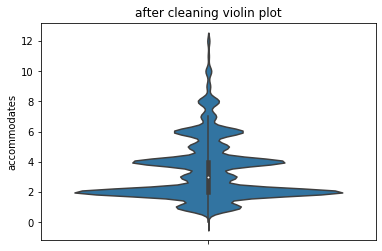

<Figure size 432x288 with 0 Axes>

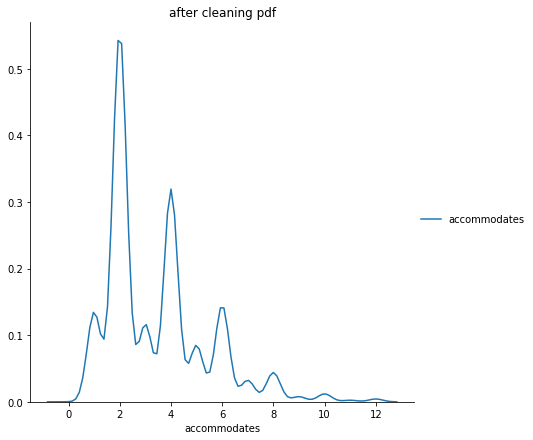

In [27]:
print('data point before cleaning accomodates less than 12',df.shape[0])
# removing all the points less than 12
df = df[df['accommodates'] < 13]
print('data point after cleaning accomodates less than 12',df.shape[0])
plt.figure(1)
sns.violinplot(y="accommodates", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"accommodates") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

In [28]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'square_feet', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'reviews_per_month'],
      dtype='object')

## extra_people

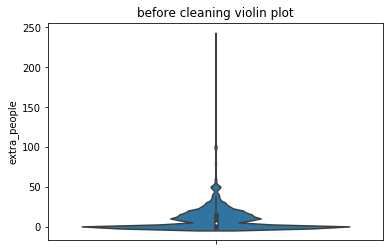

<Figure size 432x288 with 0 Axes>

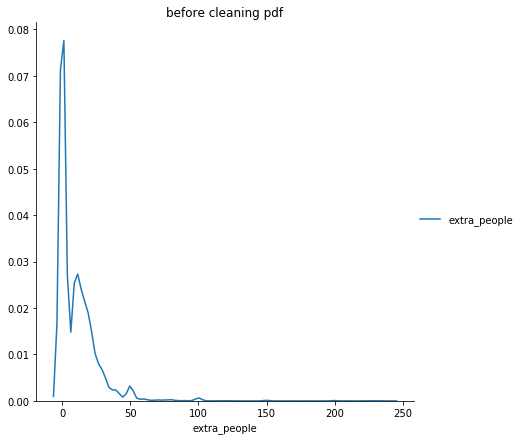

In [29]:
plt.figure(1)
sns.violinplot(y="extra_people", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"extra_people") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

In [30]:
for i in range(90,100):
    var =df["extra_people"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.0
91 percentile value is 25.0
92 percentile value is 30.0
93 percentile value is 30.0
94 percentile value is 30.0
95 percentile value is 35.0
96 percentile value is 40.0
97 percentile value is 50.0
98 percentile value is 50.0
99 percentile value is 60.0
100 percentile value is  239.0


In [31]:
df.shape

(20303, 17)

In [32]:
var =df["extra_people"].values
var = np.sort(var,axis = None)
print(var[-198:])

[ 65.  65.  65.  65.  65.  65.  65.  70.  70.  70.  70.  70.  70.  70.
  70.  70.  70.  70.  70.  70.  70.  70.  70.  70.  70.  70.  70.  75.
  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.
  75.  75.  79.  79.  79.  80.  80.  80.  80.  80.  80.  80.  80.  80.
  80.  80.  80.  80.  80.  80.  80.  80.  80.  80.  80.  80.  80.  80.
  80.  85.  85.  85.  85.  89.  90.  90.  90.  90.  90.  95.  95.  99.
  99. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 105. 112. 115. 117. 120. 120. 120. 125. 125. 150. 150. 150. 150.
 150. 150. 150. 150. 150. 150. 150. 150. 150. 170. 180. 195. 200. 200.
 200. 200. 200. 200. 200. 210. 212. 221. 224. 225. 228. 230. 231. 232.
 235. 

data point before cleaning accomodates less than 100 20303
data point after cleaning extra_people less than 100 20260


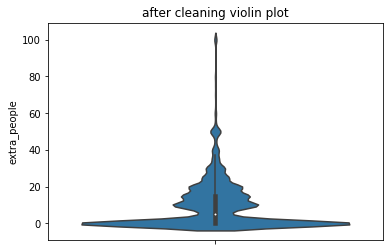

<Figure size 432x288 with 0 Axes>

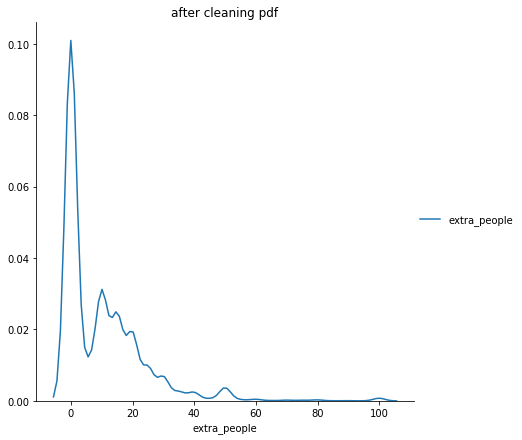

In [33]:
print('data point before cleaning accomodates less than 100',df.shape[0])
# removing all the points less than 100
df = df[df['extra_people'] < 101]
print('data point after cleaning extra_people less than 100',df.shape[0])
plt.figure(1)
sns.violinplot(y="extra_people", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"extra_people") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

In [34]:
df.shape

(20260, 17)

## analysis on square feet

In [35]:
df.square_feet.dropna().shape

(111,)

so there are only 111 points which have area values rest are blank that's why removing the square_feet column from the data

**Observation**

As 90% of the rows consist nan value that's why I am dropping the square_feet column

In [36]:
df = df.drop('square_feet', axis = 1)

In [37]:
df.shape

(20260, 16)

In [38]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'reviews_per_month'],
      dtype='object')

## Longitude and Latitude

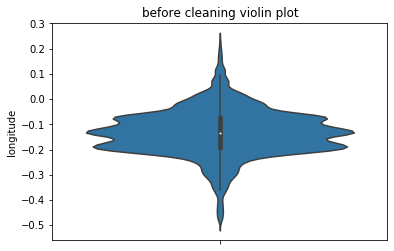

<Figure size 432x288 with 0 Axes>

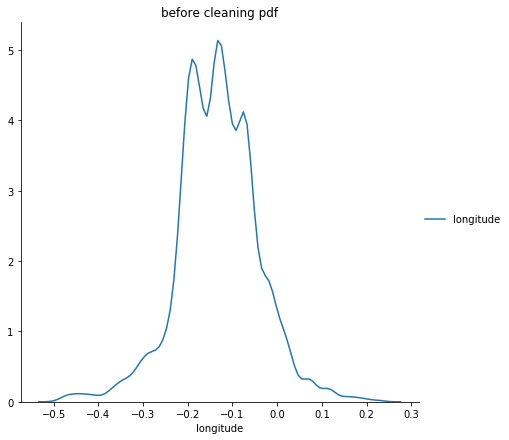

In [39]:
plt.figure(1)
sns.violinplot(y="longitude", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"longitude") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

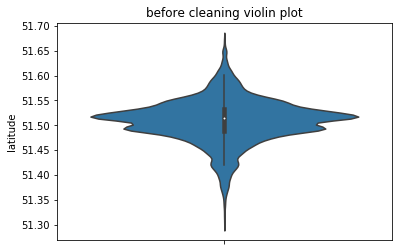

<Figure size 432x288 with 0 Axes>

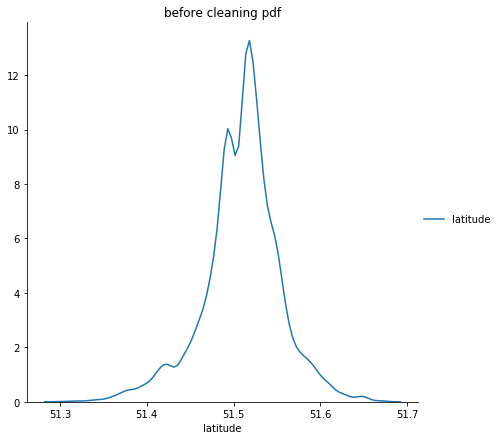

In [40]:
plt.figure(1)
sns.violinplot(y="latitude", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"latitude") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

**Observation** -- Both of the distribution looks good no issue found

## reviews_per_month analysis

In [41]:
df.shape

(20260, 16)

In [42]:
df.shape

(20260, 16)

In [43]:
df.reviews_per_month.dropna().shape

(17049,)

**observation -** 
out of 20260, 17049 rows have reviews_per_month value so removing the rows which have NAN values

In [44]:
# removing nan rows from the dataset
df = df[np.isfinite(df['reviews_per_month'])]

In [45]:
df.shape

(17049, 16)

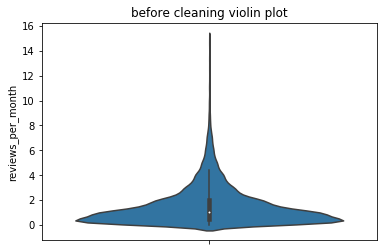

<Figure size 432x288 with 0 Axes>

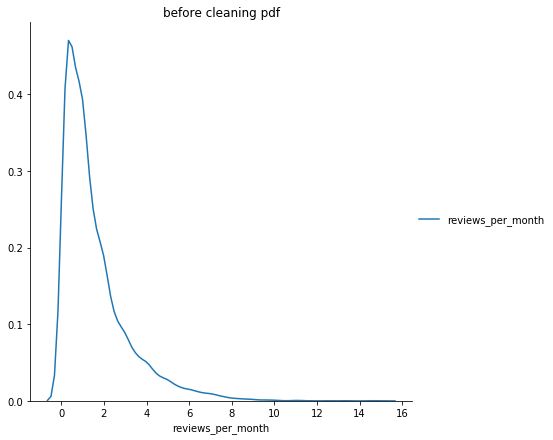

In [46]:
plt.figure(1)
sns.violinplot(y="reviews_per_month", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"reviews_per_month") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

**observation**
reviews per month can't be greater than 10 so removing all the reviews greater than 10

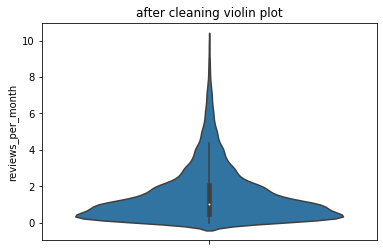

<Figure size 432x288 with 0 Axes>

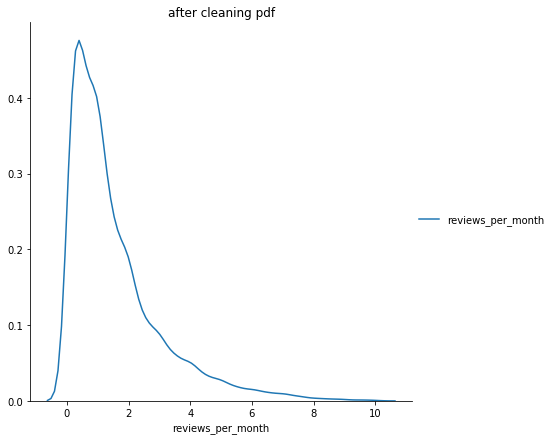

In [47]:
df = df[df['reviews_per_month'] < 10.01]
df.shape
plt.figure(1)
sns.violinplot(y="reviews_per_month", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"reviews_per_month") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

In [48]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'reviews_per_month'],
      dtype='object')

## Bathrooms

In [49]:
# removing rows which have value nan
df = df[np.isfinite(df['bathrooms'])]

In [50]:
df.shape

(17026, 16)

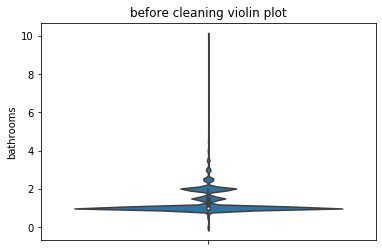

<Figure size 432x288 with 0 Axes>

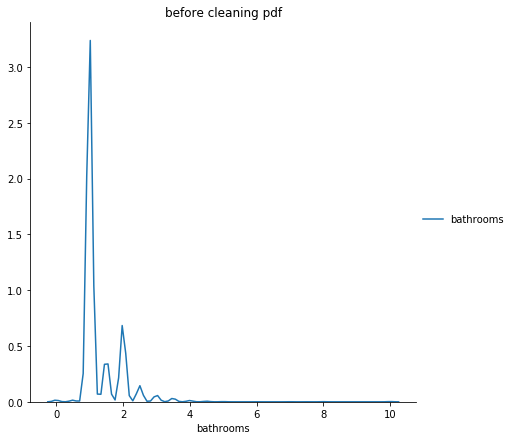

In [51]:
plt.figure(1)
sns.violinplot(y="bathrooms", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"bathrooms") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

In [52]:
for i in range(90,100):
    var =df["bathrooms"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 2.0
91 percentile value is 2.0
92 percentile value is 2.0
93 percentile value is 2.0
94 percentile value is 2.0
95 percentile value is 2.5
96 percentile value is 2.5
97 percentile value is 2.5
98 percentile value is 3.0
99 percentile value is 3.5
100 percentile value is  10.0


In [53]:
for i in range(90,100):
    var =df["bathrooms"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 2.0
91 percentile value is 2.0
92 percentile value is 2.0
93 percentile value is 2.0
94 percentile value is 2.0
95 percentile value is 2.5
96 percentile value is 2.5
97 percentile value is 2.5
98 percentile value is 3.0
99 percentile value is 3.5
100 percentile value is  10.0


In [54]:
var =df["bathrooms"].values
var = np.sort(var,axis = None)
var[-175:]

array([ 3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,
        4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4

data point before cleaning bathrooms less than 4 17026
data point after cleaning bathrooms less than 4 16986


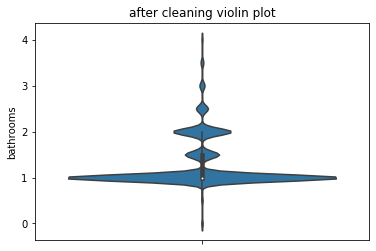

<Figure size 432x288 with 0 Axes>

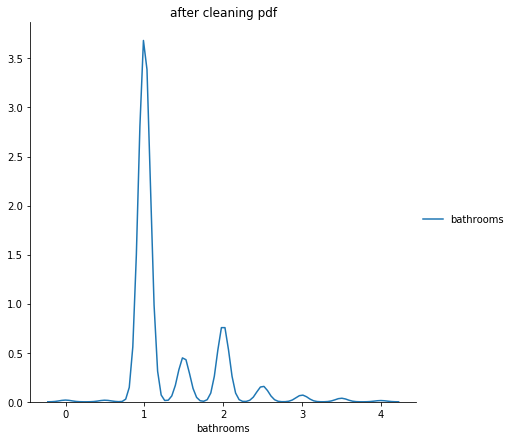

In [55]:

print('data point before cleaning bathrooms less than 4',df.shape[0])
# removing points which have bathrooms greater than 4
df = df[df['bathrooms'] < 4.1]
print('data point after cleaning bathrooms less than 4',df.shape[0])
plt.figure(1)
sns.violinplot(y="bathrooms", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"bathrooms") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

## bedrooms

In [56]:
df.shape

(16986, 16)

In [57]:
# removing rows which have value nan
df = df[np.isfinite(df['bedrooms'])]

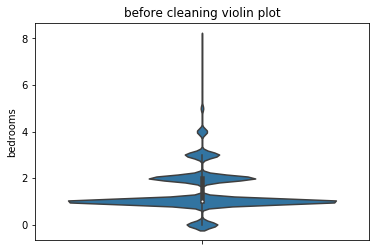

<Figure size 432x288 with 0 Axes>

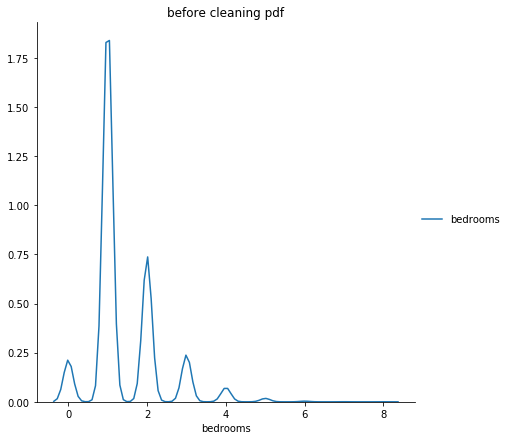

In [58]:
plt.figure(1)
sns.violinplot(y="bedrooms", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"bedrooms") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

data point before cleaning bedrooms more than 6 16983
data point after cleaning bathrooms more than 6 16872


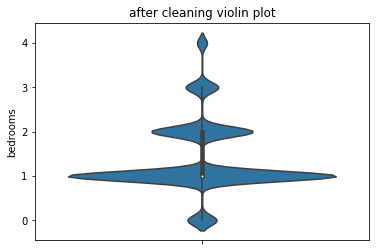

<Figure size 432x288 with 0 Axes>

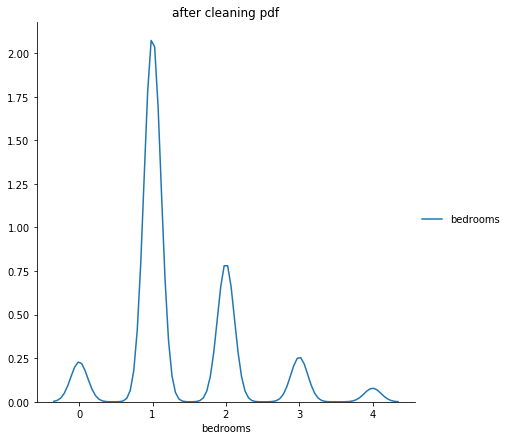

In [59]:

print('data point before cleaning bedrooms more than 6',df.shape[0])
# removing points which have bedrooms greater than 6
df = df[df['bedrooms'] < 4.1]
print('data point after cleaning bathrooms more than 6',df.shape[0])
plt.figure(1)
sns.violinplot(y="bedrooms", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"bedrooms") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

In [60]:
df.columns

Index(['description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'reviews_per_month'],
      dtype='object')

In [61]:
df.shape

(16872, 16)

## Beds


In [62]:
# removing rows which have value nan
df = df[np.isfinite(df['beds'])]

In [63]:
df.shape

(16866, 16)

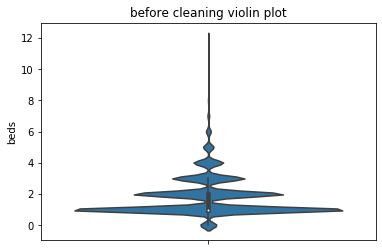

<Figure size 432x288 with 0 Axes>

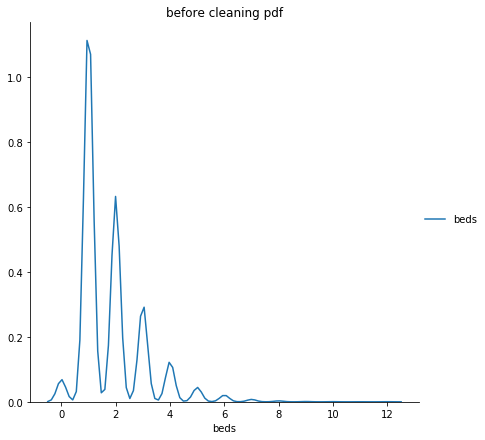

In [64]:
plt.figure(1)
sns.violinplot(y="beds", data =df)
plt.title('before cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"beds") \
      .add_legend();
plt.title('before cleaning pdf')
plt.show()

data point before cleaning beds more than 8 16866
data point after cleaning bathrooms more than 8 16854


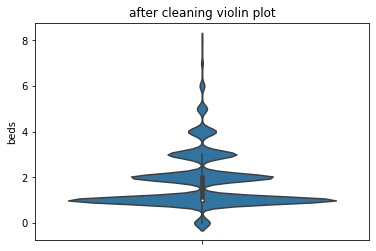

<Figure size 432x288 with 0 Axes>

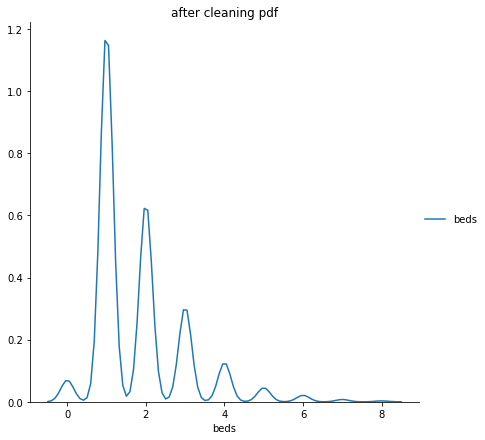

In [65]:

print('data point before cleaning beds more than 8',df.shape[0])
# removing points which have bathrooms greater than 8
df = df[df['beds'] < 9]
print('data point after cleaning bathrooms more than 8',df.shape[0])
plt.figure(1)
sns.violinplot(y="beds", data =df)
plt.title('after cleaning violin plot')
plt.figure(2)
sns.FacetGrid(df,size=6) \
      .map(sns.kdeplot,"beds") \
      .add_legend();
plt.title('after cleaning pdf')
plt.show()

## bed_type

In [66]:
df['bed_type'].value_counts()

Real Bed         16722
Pull-out Sofa       81
Futon               32
Couch               14
Airbed               5
Name: bed_type, dtype: int64

In [67]:
categories_to_rename = ['Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
df['bed_type'].loc[df['bed_type'].isin(categories_to_rename)] = 'Not Real bed'
df['bed_type'].value_counts()

Real Bed        16722
Not Real bed      132
Name: bed_type, dtype: int64

## property_type

In [68]:
df['property_type'].value_counts()

Apartment                 11851
House                      2853
Townhouse                   661
Serviced apartment          507
Condominium                 270
Loft                        176
Bed and breakfast           126
Guest suite                 106
Guesthouse                   77
Hostel                       36
Hotel                        35
Bungalow                     34
Other                        26
Boutique hotel               22
Cottage                      12
Tiny house                   12
Boat                         10
Aparthotel                    8
Villa                         7
Cabin                         4
Houseboat                     4
Hut                           3
Camper/RV                     3
Earth house                   3
Chalet                        3
Barn                          1
Treehouse                     1
Nature lodge                  1
Tent                          1
Casa particular (Cuba)        1
Name: property_type, dtype: int64

In [69]:
propertys = df.property_type.values
for i in range(0, df.shape[0]): 
    if propertys[i] != 'Apartment':
        propertys[i] = 'Others'
df.property_type = propertys
df.property_type.value_counts()

Apartment    11851
Others        5003
Name: property_type, dtype: int64

In [70]:
df.shape

(16854, 16)

## Description

In [71]:
# removing all the rows which have nan values
df = df.dropna()

In [72]:
df.to_csv('./cleaned_features.csv',index=False)
df.shape

(16664, 16)